In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from time import process_time

sys.setrecursionlimit(1_000_000)

In [21]:
# Get input
with open('input.txt') as f:
    n = int(f.readline())
    a = int(f.readline())
    b = int(f.readline())
    c = int(f.readline())

(a) Write a direct recursive implementation (without any dynamic programming component) of this recurrence.

Submit this implementation to the Kattis problem. It will likely get a "Time Limit Exceeded Result". In order to pass this part of the lab, your implementation here must pass at least the first 33 test cases on Kattis.

In [2]:
def recursive_a(n):
    if n < 0:
        return np.inf
    elif n == 0:
        return 0
    
    return min((n, 1 + recursive_a(n-a), 1 + recursive_a(n-b), 1 + recursive_a(n-c)))

In [23]:
# Call solution a
recursive_a(n)

3

(b) Fix the values a = 5, b = 6, c = 7 (the same ones used in the second sample input on Kattis) and time your code for increasing values of n. How large instances (what value of n) can your program solve in 1 second (on your machine)? If you take that n and increment it by one at a time (i.e., try n+1, n+2, n+3 etc), how does the runtime
change? If you instead take that n and then repeatedly double it (i.e. try 2*n, 4*n, 8*n, etc), how does the runtime change? Tabulate and/or plot the results. Based on these experiments, what would be a reasonable estimate of the time complexity of your program?

In [43]:
def time_a(n):
    start = process_time()
    recursive_a(n)
    end = process_time()
    
    return end - start

In [2]:
a = 5
b = 6
c = 7

In [48]:
n = 81
linear = [n+x for x in range(0,20)]
exponential = [2**x * n for x in range(3)]

In [49]:
print(linear, exponential)

[81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100] [81, 162, 324]


In [50]:
linear_res = [time_a(x) for x in linear]

In [9]:
exponential_res = [time_a(x) for x in exponential]

KeyboardInterrupt: 

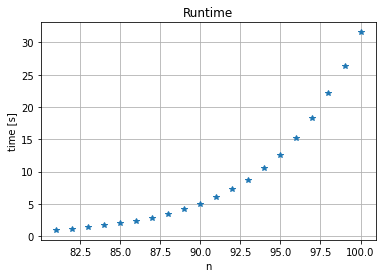

In [73]:
plt.title("Runtime")
plt.plot(linear, linear_res, "*")
#plt.plot(exponential, exponential_res)
plt.xlabel(r'n')
plt.ylabel(r'time [s]')
plt.grid()
plt.show()

(c) Make a new implementation, based on the one from (a), but where you add memoization to save computed values of the Coins() function and reuse them when they are needed again, thereby turning this into a dynamic programming solution.

Submit this implementation to the Kattis problem. In order to pass this part of the lab, your implementation here must get an Accepted result on Kattis.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from time import process_time

sys.setrecursionlimit(1_000_000)

In [18]:
a = 5
b = 6
c = 7

In [3]:
def memoization(n):
    b_buffer = [None for x in range(n+1)]

    return memoization_helper(n, b_buffer)
    
def memoization_helper(n, buffer):    
    if n < 0:
        return 10**10
    elif n == 0:
        return 0
    elif buffer[n] is not None:
        return buffer[n]
    else:
        buffer[n] = min(n, 1 + memoization_helper(n-a, buffer), 1 + memoization_helper(n-b, buffer), 1 + memoization_helper(n-c, buffer))

    return buffer[n]


In [4]:
def time_b(n):
    start = process_time()
    memoization(n)
    end = process_time()
    
    return end - start

In [5]:
n = 1000
linear = [n+x for x in range(0,20)]
exponential = [2**x * n for x in range(3)]

In [6]:
linear_res = [time_b(x) for x in linear]
exponential_res = [time_b(x) for x in exponential]

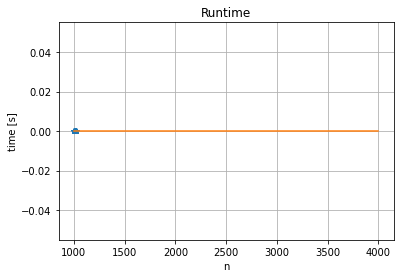

In [7]:
plt.title("Runtime")
plt.plot(linear, linear_res, "*")
plt.plot(exponential, exponential_res)
plt.xlabel(r'n')
plt.ylabel(r'time [s]')
plt.grid()
plt.show()

(e) Make a bottom-up implementation of this algorithm. In other words, instead of a recursive algorithm, write an iterative algorithm with a for loop that tabulates the values of Coins() from small to large. In order to pass this part of the lab, your implementation here must get an Accepted result on Kattis.

Compare the running time of this program with the one from (c). What differences are there, if any?

In [54]:
a = 5
b = 6
c = 7

In [56]:
def get_buffer(i, buffer):
    if i < 0:
        return 10**10
    
    return buffer[i]
    

def bottom_up(n):
    if n < 0:
        return 10**10
    elif n == 0:
        return 0

    buffer = [0 for i in range(n+1)]
    for i in range(1,n+1):
        buffer[i] = min(i, 1 + get_buffer(i-a, buffer), 1 + get_buffer(i-b, buffer), 1 + get_buffer(i-c, buffer))
        print(buffer)

    return buffer[n]


In [57]:
def time_c(n):
    start = process_time()
    bottom_up(n)
    end = process_time()
    
    return end - start

In [58]:
n = 1000
linear = [n+x for x in range(0,20)]
exponential = [2**x * n for x in range(3)]

In [59]:
linear_res = [time_b(x) for x in linear]
exponential_res = [time_b(x) for x in exponential]

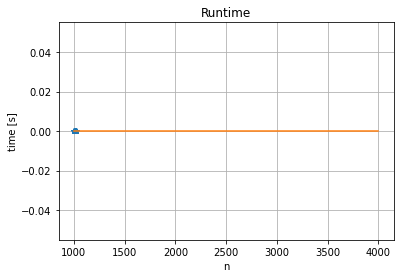

In [60]:
plt.title("Runtime")
plt.plot(linear, linear_res, "*")
plt.plot(exponential, exponential_res)
plt.xlabel(r'n')
plt.ylabel(r'time [s]')
plt.grid()
plt.show()